In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\Arch technologies\Stock price.csv')

In [61]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [62]:
df.shape

(1692, 7)

In [63]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


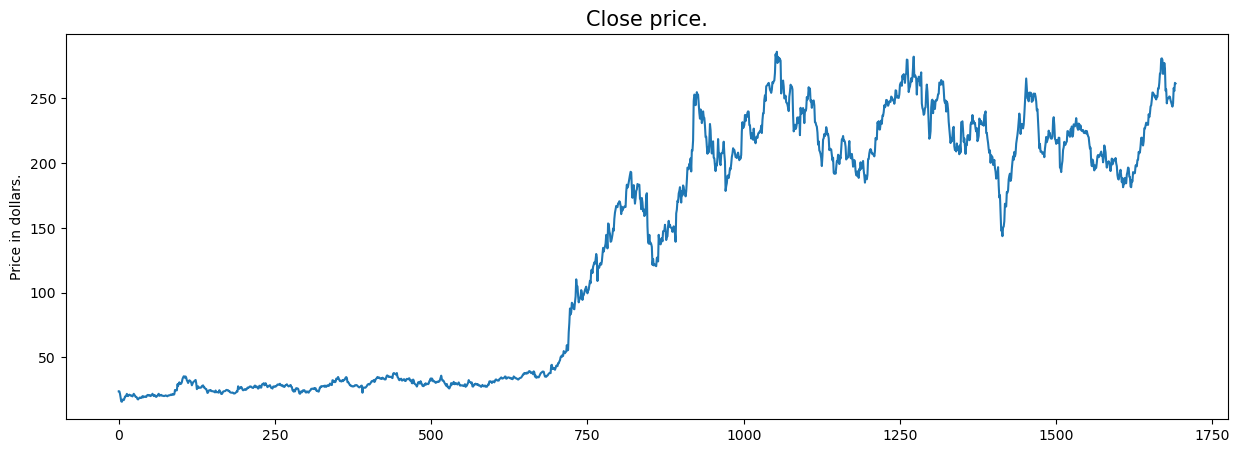

In [64]:
plt.figure(figsize=(15,5)) ###  plt.figure(figsize=(15,5))
                               
plt.plot(df['Close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [65]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

In [66]:
df.drop(columns='Adj Close', axis=1)

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400


In [67]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

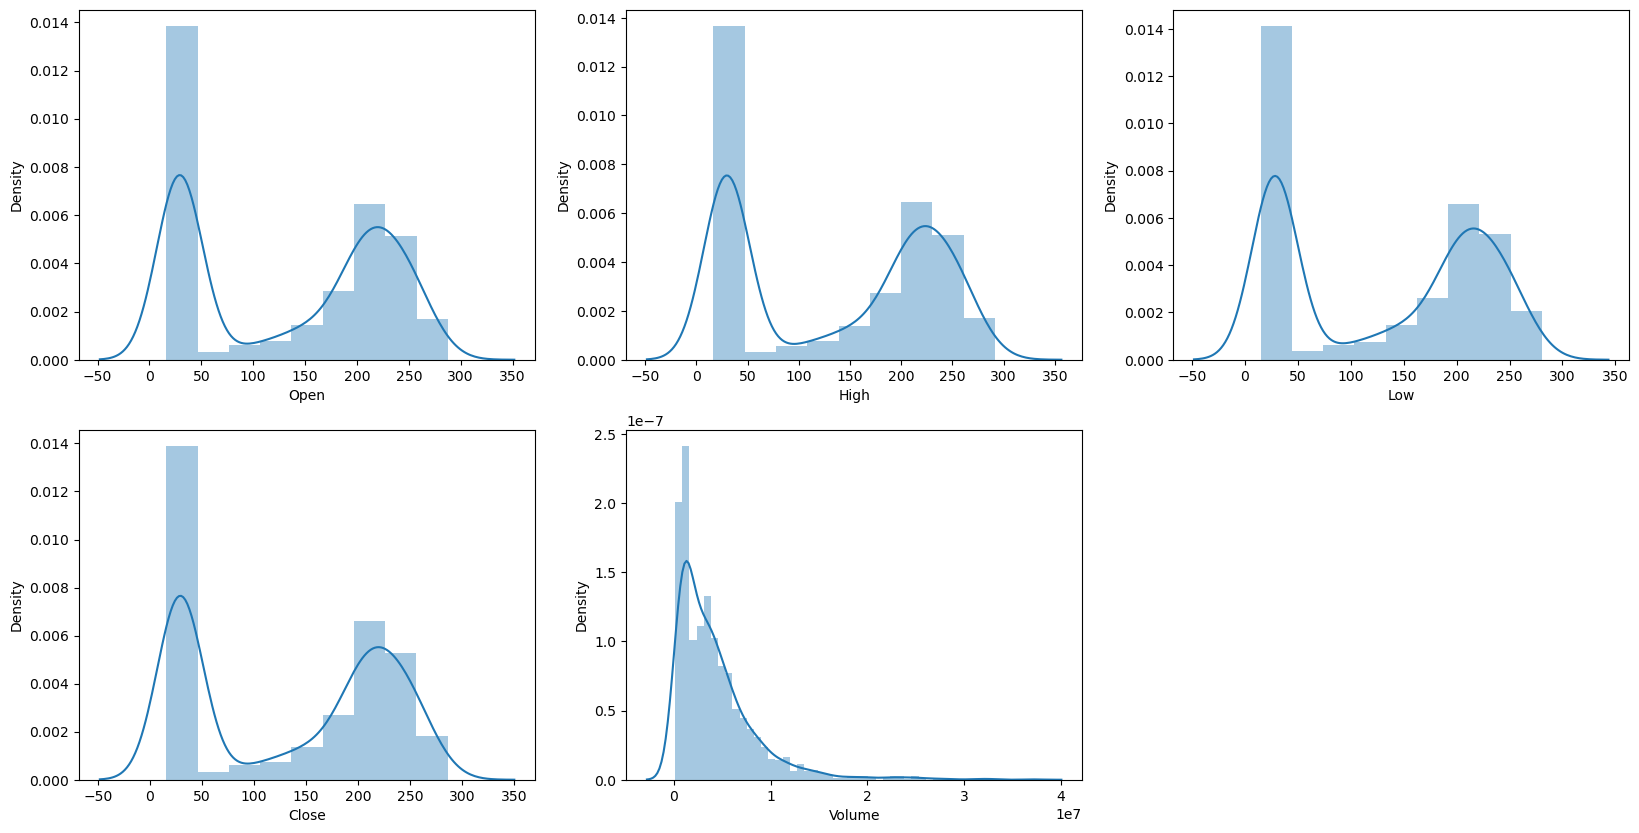

In [68]:
features = ['Open','High','Low','Close','Volume']
plt.subplots(figsize=(20,10))
for i , col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

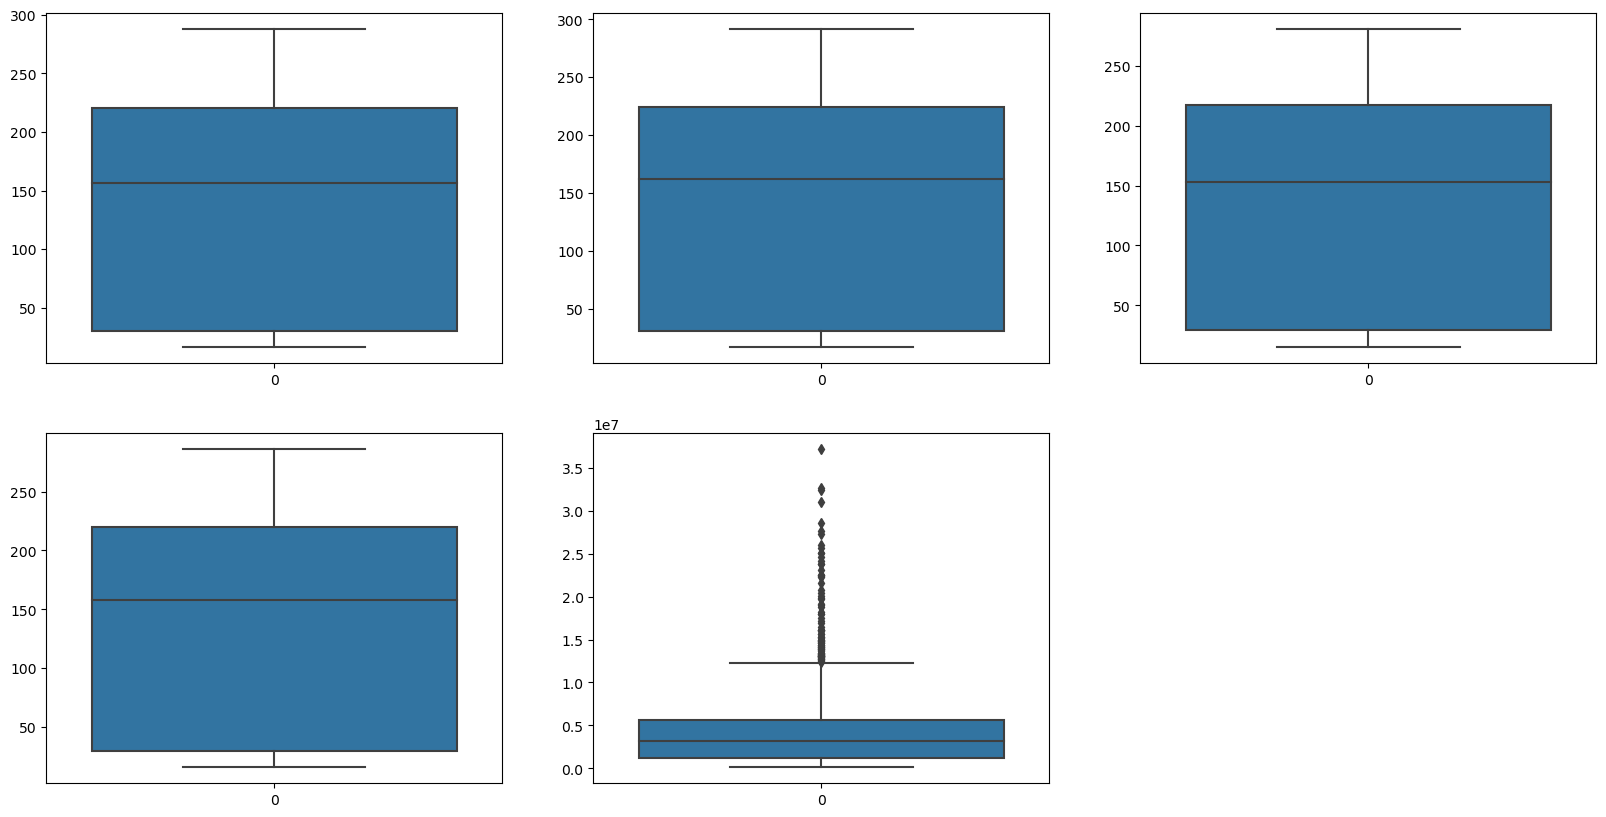

In [69]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [70]:
splitted = df['Date'].str.split('/', expand=True)
splitted
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010


In [71]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010,0


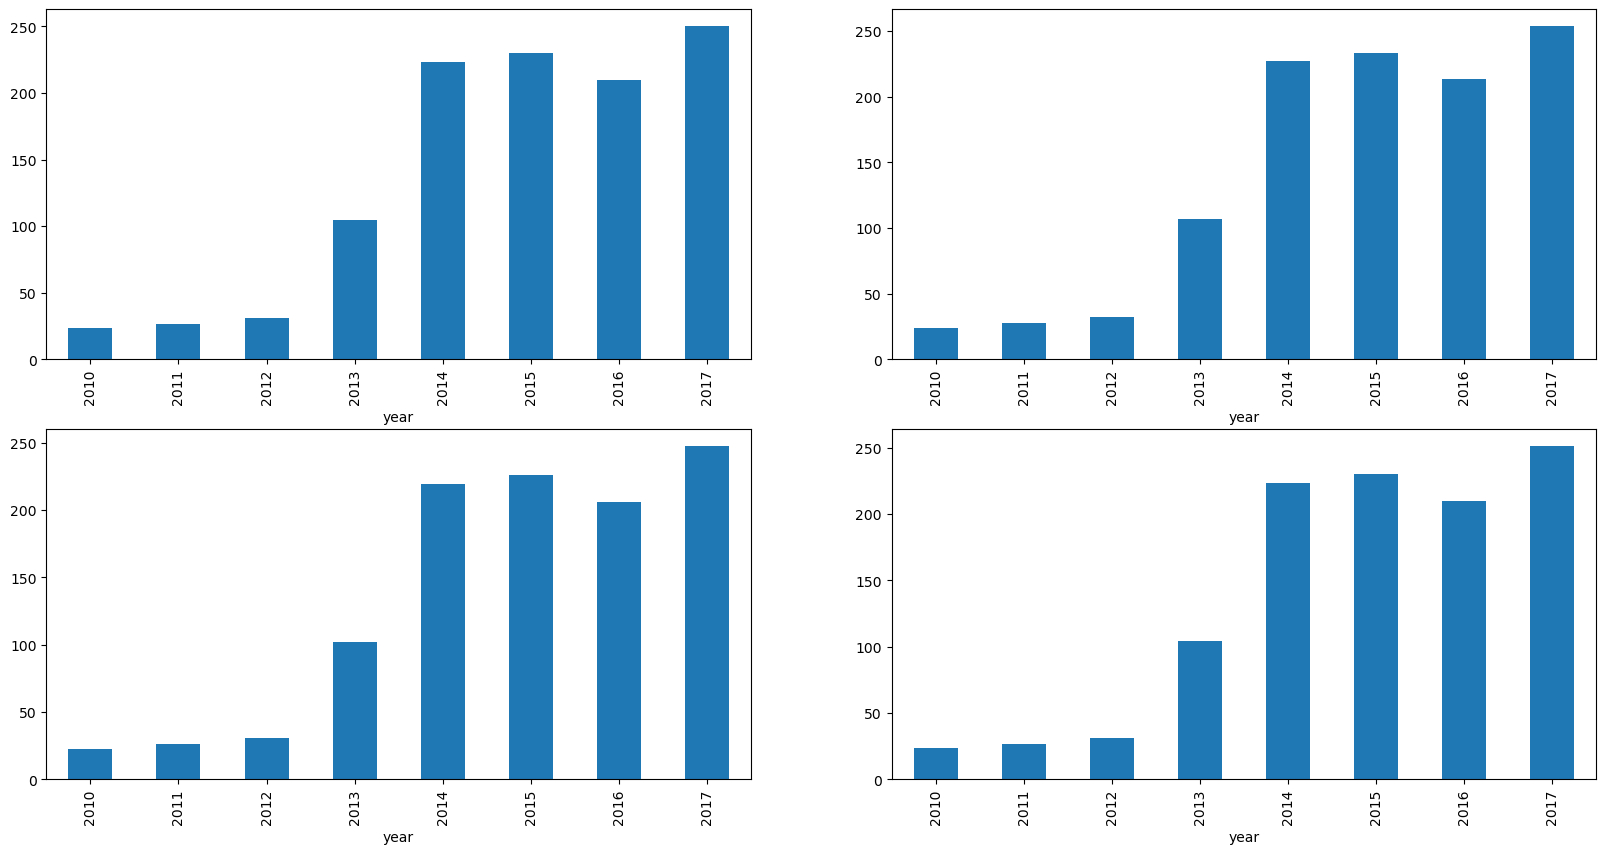

In [72]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [73]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Adj Close,day,month,year
is_quarter_end,,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,130.797709,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,135.673269,15.657244,7.584806,2013.314488


In [74]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010,0


In [75]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [76]:
df.drop('Adj Close',axis=1)

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,13,3,2017,1,-1.349991,-4.070007,1
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,14,3,2017,1,-11.889999,-12.099991,0
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,15,3,2017,1,1.270004,-6.729996,1
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,16,3,2017,1,0.350006,-6.690002,0


In [77]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year,is_quarter_end,open-close,low-high,target
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010,1,-4.889999,-7.459999,0
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010,1,1.960001,-7.120001,0
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010,0,3.040001,-5.650000,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010,0,3.799999,-4.390001,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010,0,3.889999,-4.170000,0


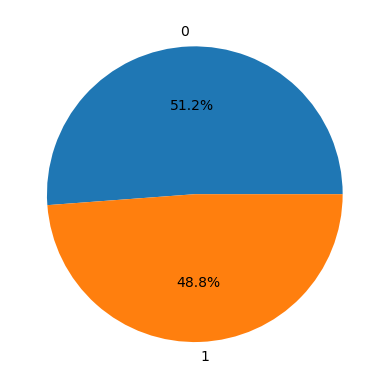

In [78]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [79]:
df['target'].value_counts()

target
1    866
0    826
Name: count, dtype: int64

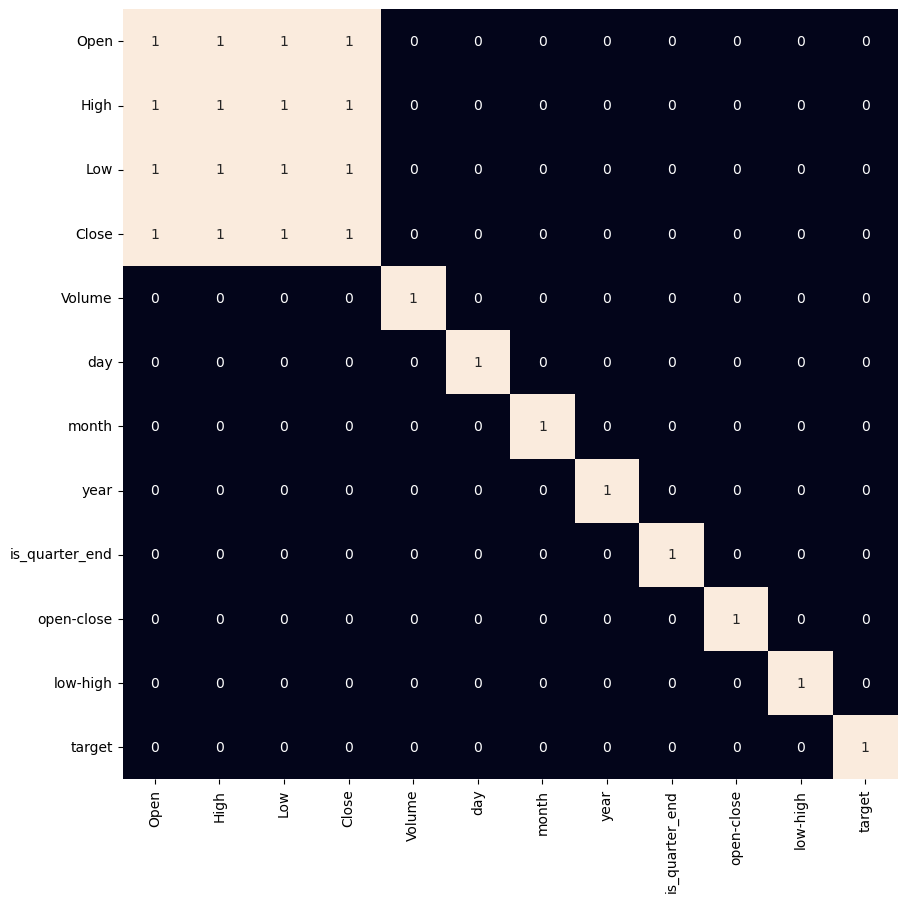

In [81]:
plt.figure(figsize=(10, 10)) 

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sns.heatmap(df.drop(columns=['Date','Adj Close'], axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()


In [51]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1522, 3) (170, 3)


In [52]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5191709844559586
Validation Accuracy :  0.5435330347144457

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4719006908462867
Validation Accuracy :  0.4461086226203807

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Traini

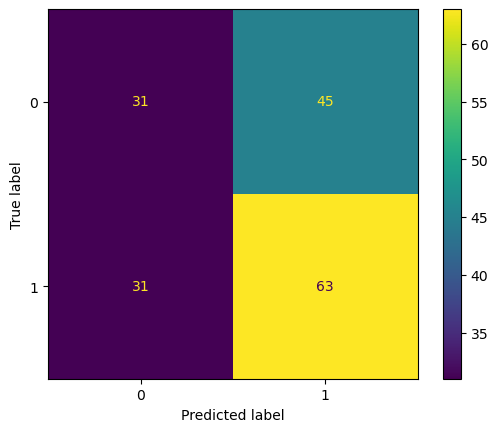

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()
